In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu, "\n")
else:
  print("No GPU device found")

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#print(physical_devices)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU') 



In [3]:
!nvidia-smi

Sun Jan 29 06:55:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.56       Driver Version: 527.56       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   38C    P8    11W / 200W |    758MiB /  8192MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
df = pd.read_csv('H:\\Datasets\\Edge-IIoTset\\Selected dataset for ML and DL\\DNN-EdgeIIoT-dataset.csv', low_memory=False) 

print("Read Completed!")

In [5]:
df.head(5)
print(df['Attack_type'].value_counts())

Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: Attack_type, dtype: int64


In [6]:
from sklearn.utils import shuffle
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 
                "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)
df = shuffle(df)
df.isna().sum()
print(df['Attack_type'].value_counts())

Normal                   1363998
DDoS_UDP                  121567
DDoS_ICMP                  67939
SQL_injection              50826
DDoS_TCP                   50062
Vulnerability_scanner      50026
Password                   49933
DDoS_HTTP                  48544
Uploading                  36807
Backdoor                   24026
Port_Scanning              19977
XSS                        15066
Ransomware                  9689
Fingerprinting               853
MITM                         358
Name: Attack_type, dtype: int64


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    
encode_text_dummy(df,'http.request.method')
encode_text_dummy(df,'http.referer')
encode_text_dummy(df,"http.request.version")
encode_text_dummy(df,"dns.qry.name.len")
encode_text_dummy(df,"mqtt.conack.flags")
encode_text_dummy(df,"mqtt.protoname")
encode_text_dummy(df,"mqtt.topic")

In [ ]:
df.to_csv('H:\\Datasets\\Edge-IIoTset\\Selected dataset for ML and DL\\preprocessed_DNN.csv', encoding='utf-8', index=False)

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('H:\\Datasets\\Edge-IIoTset\\Selected dataset for ML and DL\\preprocessed_DNN.csv', low_memory=False) 
df.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.453868e+08,...,0,0,0,0,1,0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420522.0,2.372045e+09,...,0,0,0,0,1,0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0,0,0,0,1,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.466922e+08,...,0,0,0,0,1,0,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.942258e+09,...,0,0,0,0,1,0,0,0,0,1


In [6]:
df['Attack_type'].value_counts()

Normal                   1363998
DDoS_UDP                  121567
DDoS_ICMP                  67939
SQL_injection              50826
DDoS_TCP                   50062
Vulnerability_scanner      50026
Password                   49933
DDoS_HTTP                  48544
Uploading                  36807
Backdoor                   24026
Port_Scanning              19977
XSS                        15066
Ransomware                  9689
Fingerprinting               853
MITM                         358
Name: Attack_type, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909671 entries, 0 to 1909670
Data columns (total 97 columns):
 #   Column                                                                                                Dtype  
---  ------                                                                                                -----  
 0   arp.opcode                                                                                            float64
 1   arp.hw.size                                                                                           float64
 2   icmp.checksum                                                                                         float64
 3   icmp.seq_le                                                                                           float64
 4   icmp.unused                                                                                           float64
 5   http.content_length                                                          

In [8]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)
feat_cols

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'icmp.unused',
 'http.content_length',
 'http.response',
 'http.tls_port',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.qry.type',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msg_decoded_as',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-PROPFIND',
 'http.request.method-PUT',
 'http.request.method-SEARCH',
 'http.request.method-TRACE',

In [9]:
len(feat_cols)

96

In [10]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

<AxesSubplot:>

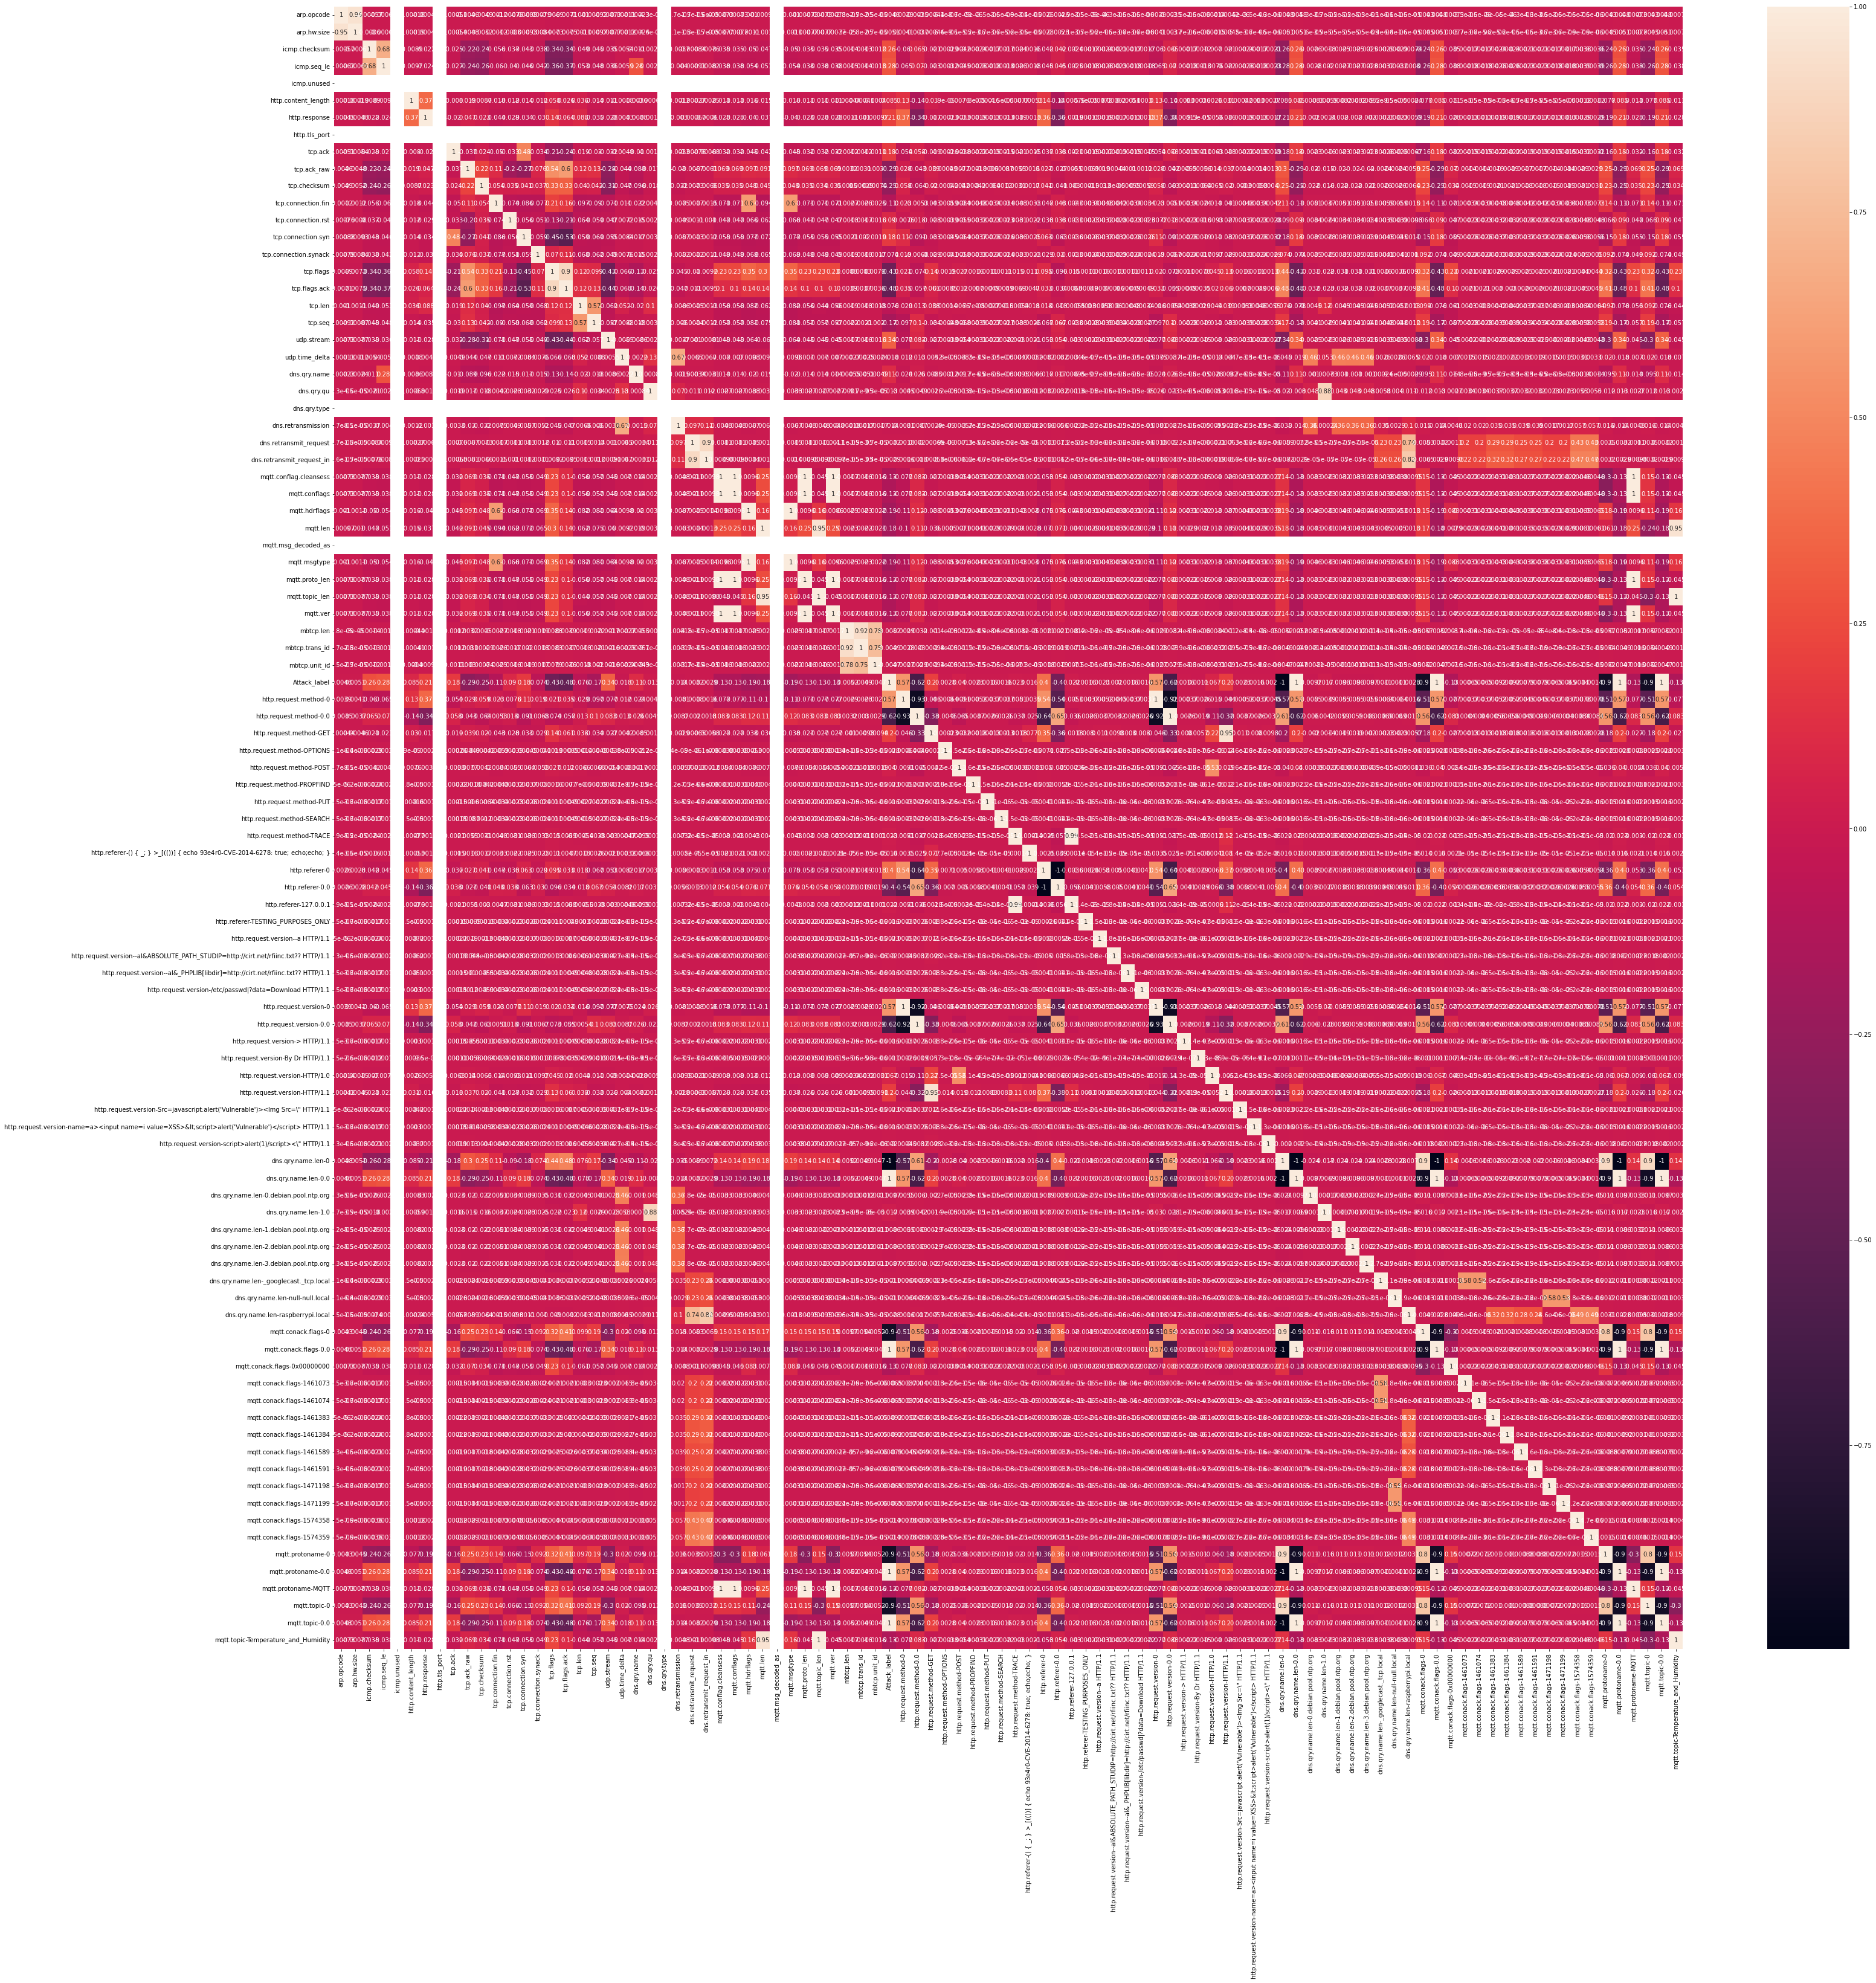

In [10]:
corr_matrix = df[feat_cols].corr()
fig = plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True)

In [11]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

In [12]:
df[skip_list[3]].value_counts()

0.0    1909671
Name: mqtt.msg_decoded_as, dtype: int64

In [13]:
df.drop(skip_list, axis=1, inplace=True)
feat_cols = list(df.columns)
feat_cols.remove(label_col)
feat_cols

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'http.content_length',
 'http.response',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-PROPFIND',
 'http.request.method-PUT',
 'http.request.method-SEARCH',
 'http.request.method-TRACE',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; ech

In [14]:
X = df.drop([label_col], axis=1)
y = df[label_col]

del df

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

del X
del y

In [16]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
Y_train =  label_encoder.fit_transform(y_train)
Y_test = label_encoder.transform(y_test)

In [17]:
label_encoder.classes_

array(['Backdoor', 'DDoS_HTTP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_UDP',
       'Fingerprinting', 'MITM', 'Normal', 'Password', 'Port_Scanning',
       'Ransomware', 'SQL_injection', 'Uploading',
       'Vulnerability_scanner', 'XSS'], dtype=object)

In [21]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 5.298843279052425,
 1: 2.622610188403931,
 2: 1.8739133901246834,
 3: 2.5430478568456096,
 4: 1.047258867764148,
 5: 149.33880742913001,
 6: 356.1156177156177,
 7: 0.09333692571528418,
 8: 2.549668719437908,
 9: 6.37273599466066,
 10: 13.140119554466091,
 11: 2.5048342801865835,
 12: 3.458842174375693,
 13: 2.544890599102138,
 14: 8.450100943057054}

In [21]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

# MinMax Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [23]:
#X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
#X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
input_shape = X_train.shape[1]

In [19]:
print(X_train.shape, X_test.shape)
print(input_shape)

(1527736, 92) (381935, 92)
92


In [20]:
num_classes = len(np.unique(Y_train))
num_classes

15

In [21]:
from  tensorflow.keras.utils import to_categorical 

Y_train = to_categorical(Y_train, num_classes=num_classes)
Y_test = to_categorical(Y_test, num_classes=num_classes)

#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

In [28]:
print(Y_train.shape, Y_test.shape)

(1527736, 15) (381935, 15)


In [22]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Input, ZeroPadding1D
from tensorflow.keras.layers import MaxPooling1D, Add, AveragePooling1D
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam

# DCNNBiLSTM

In [30]:
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten
from keras.layers import LSTM, Bidirectional, BatchNormalization, Convolution1D, MaxPooling1D, Reshape

#Bidirectional CNN-LSTM
batch_size = 32
model = Sequential()

model.add(Convolution1D(96, kernel_size=76, padding="same",activation="relu",input_shape=(92, 1)))
#model.add(MaxPooling1D(pool_length=(5)))

model.add(BatchNormalization())

model.add(Bidirectional(LSTM(96, return_sequences=False))) 
model.add(Reshape((192, 1), input_shape = (96, )))
    
model.add(BatchNormalization())

model.add(Bidirectional(LSTM(128, return_sequences=False))) 
  
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu')) 
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))    
model.add(Dropout(0.1))

model.add(Dense(15)) #Output Layer
model.add(Activation('softmax'))

model.summary()

#optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 92, 96)            7392      
                                                                 
 batch_normalization (BatchN  (None, 92, 96)           384       
 ormalization)                                                   
                                                                 
 bidirectional (Bidirectiona  (None, 192)              148224    
 l)                                                              
                                                                 
 reshape (Reshape)           (None, 192, 1)            0         
                                                                 
 batch_normalization_1 (Batc  (None, 192, 1)           4         
 hNormalization)                                                 
                                                        

In [31]:
early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)
    
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=30,
                              verbose=True, #callbacks=[reduce_lr, early_stop_callback],
                              validation_data=(X_test, Y_test))  

Epoch 1/30
11936/11936 [==============================] - 515s 50ms/step - loss: 0.0240 - accuracy: 0.9655 - val_loss: 0.0225 - val_accuracy: 0.9796
Epoch 2/30
11936/11936 [==============================] - 513s 51ms/step - loss: 0.0239 - accuracy: 0.9657 - val_loss: 0.0223 - val_accuracy: 0.9804
Epoch 3/30
11936/11936 [==============================] - 507s 51ms/step - loss: 0.0232 - accuracy: 0.9702 - val_loss: 0.0214 - val_accuracy: 0.9828
Epoch 4/30
11936/11936 [==============================] - 506s 51ms/step - loss: 0.0227 - accuracy: 0.9720 - val_loss: 0.0207 - val_accuracy: 0.9832
Epoch 5/30
11936/11936 [==============================] - 513s 51ms/step - loss: 0.0225 - accuracy: 0.9723 - val_loss: 0.0203 - val_accuracy: 0.9841
Epoch 6/30
11936/11936 [==============================] - 503s 51ms/step - loss: 0.0220 - accuracy: 0.9727 - val_loss: 0.0199 - val_accuracy: 0.9847
Epoch 7/30
11936/11936 [==============================] - 506s 51ms/step - loss: 0.0219 - accuracy: 0.9733

In [34]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

11936/11936 [==============================] - 226s 19ms/step
Completed
Time taken: 0:07:34.801343
Validation score: 0.9464437666095016
Evaluation score: [0.10803712904453278, 0.9964437961578369]
Recall score: 0.9964437666095016
Precision score: 0.9966161897221369
F1 Measure score: 0.9913437843080619
ROC-AUC score: 0.9510431149753011


In [35]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [36]:
import time

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))

pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

11936/11936 [==============================] - 227s 19ms/step
Inference time: 219.29 seconds


In [37]:
pred.shape
y_test.shape

(381935,)

In [38]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[  4915,      0,      0,      0,      1,      0,      0,      0,
             0,      0,      3,      0,      0,      0,      0],
       [     0,  12324,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,    141,    423],
       [     0,      0,  13541,      1,      1,     45,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,  12091,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,  24314,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      5,     26,      0,    100,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0,      0,     72,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,  

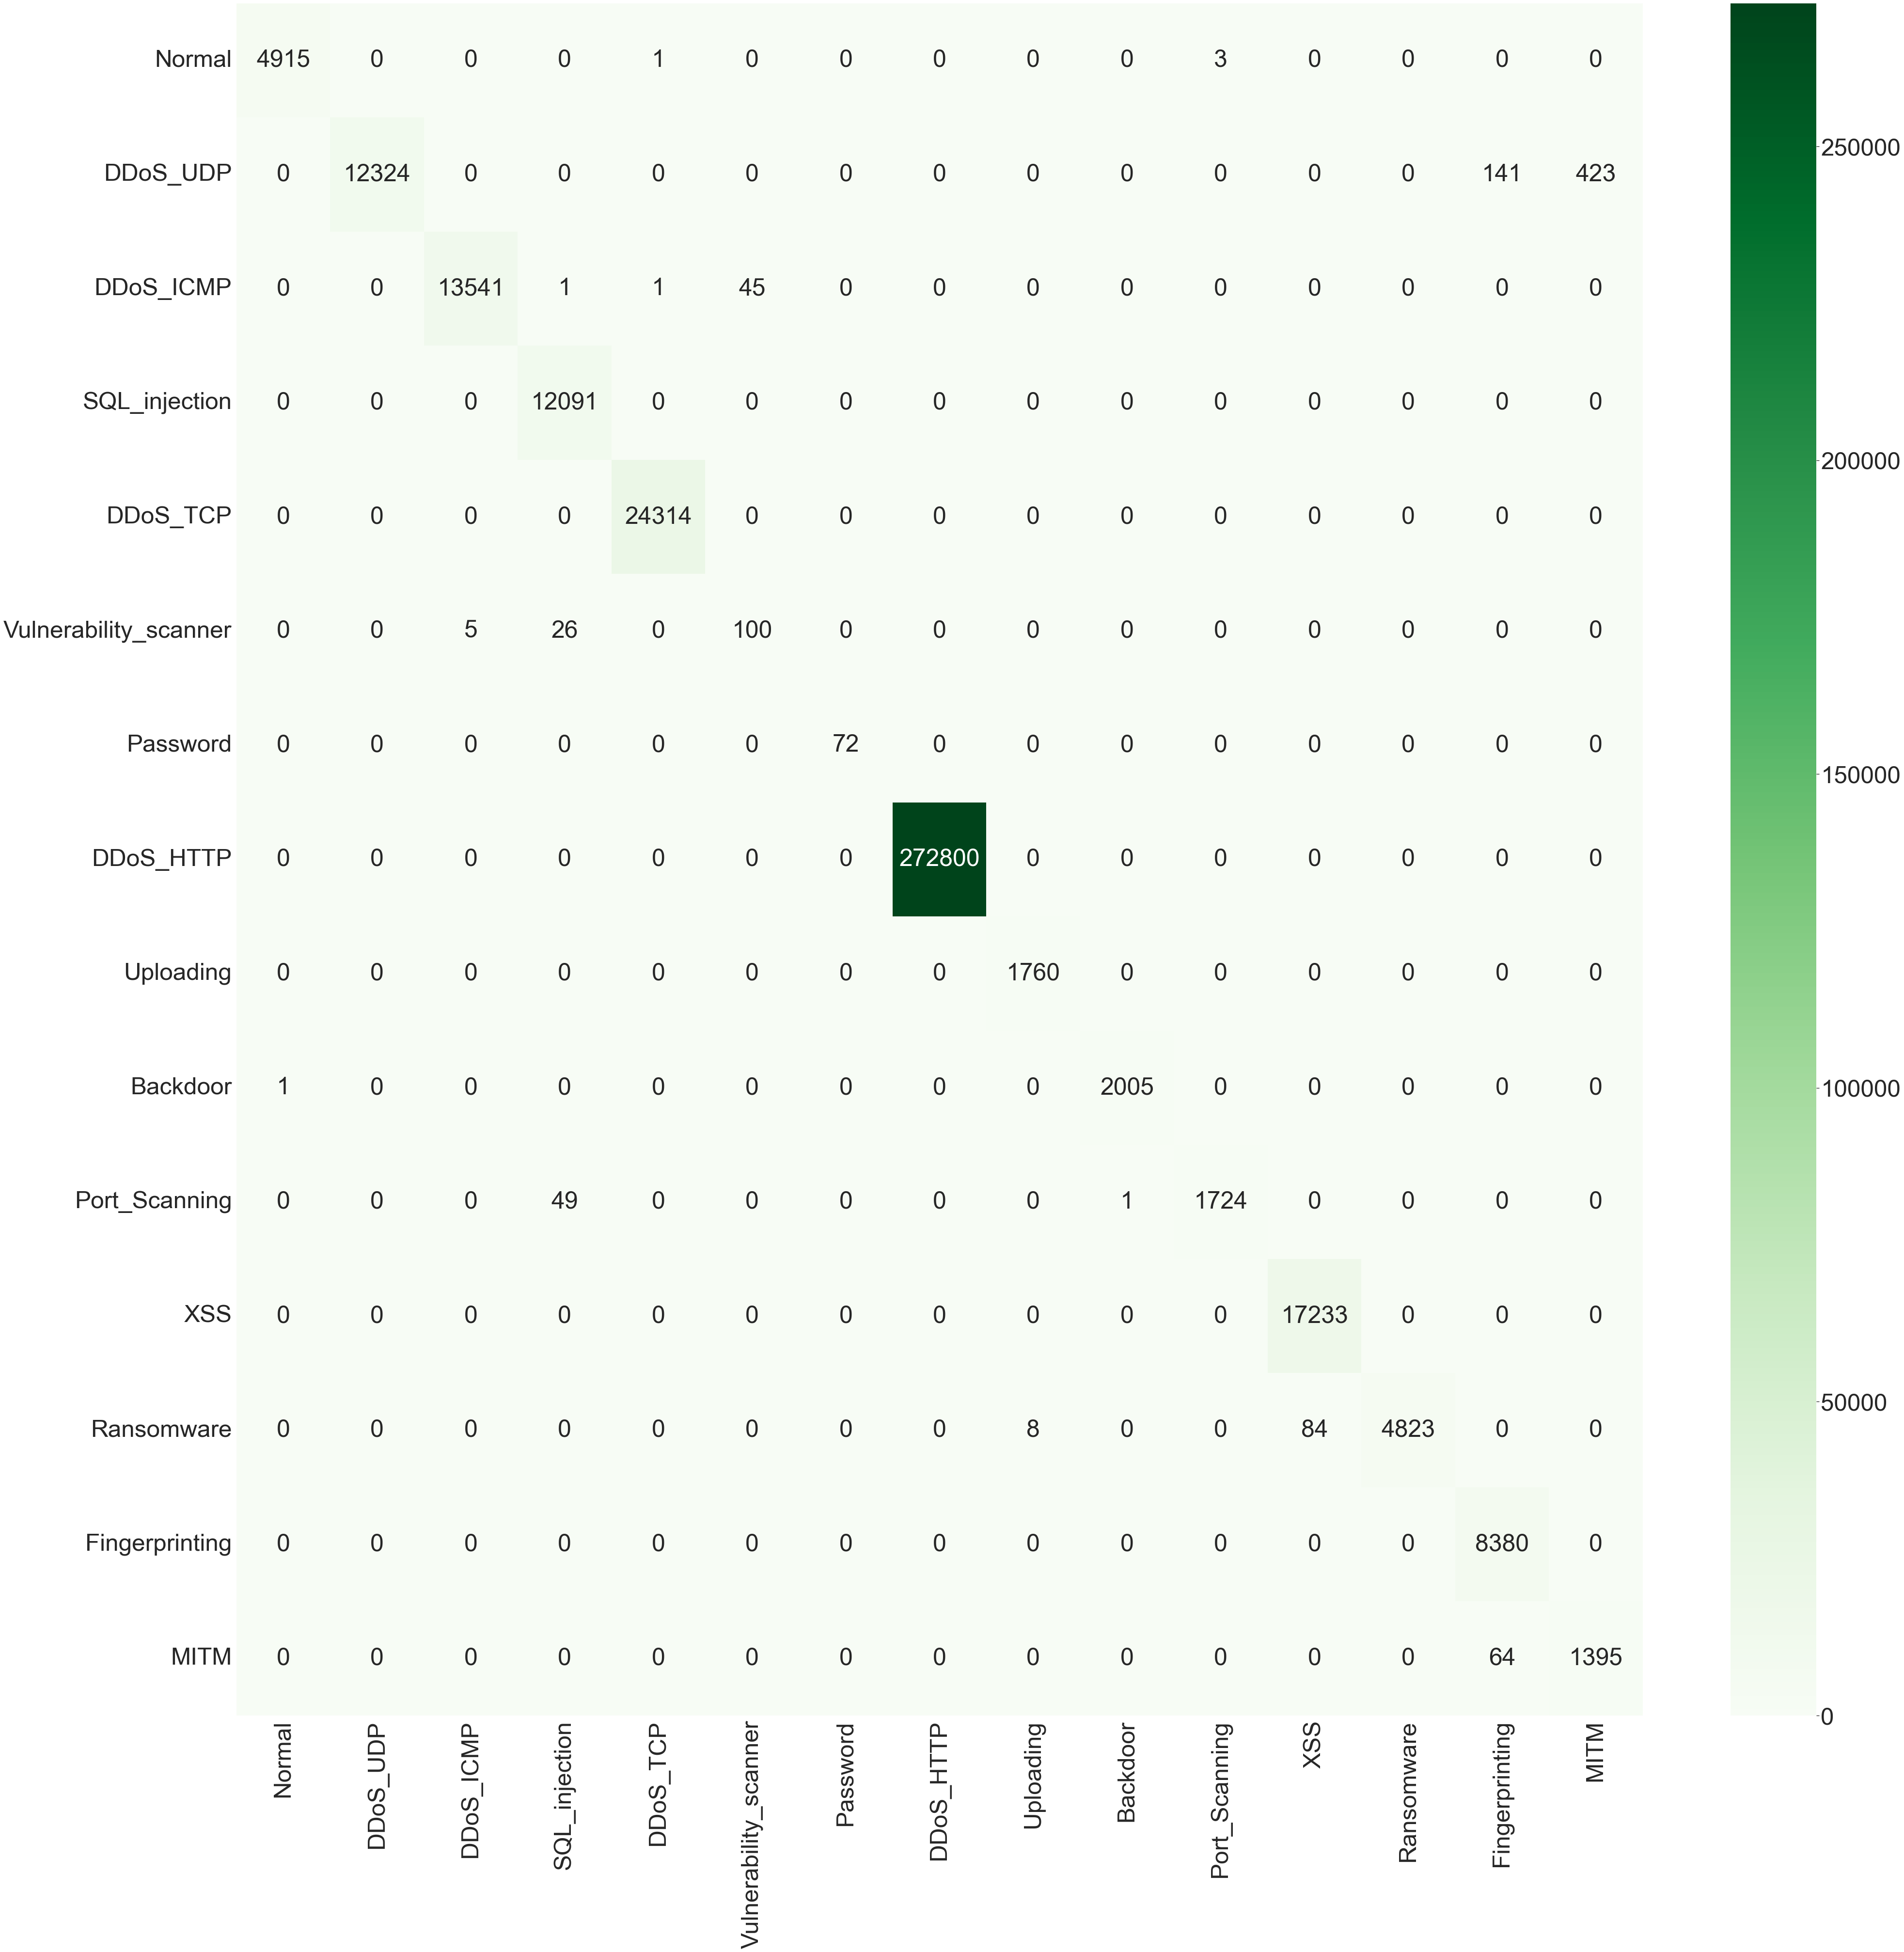

In [39]:
cf_matrix = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cf_matrix)

labels = ['Normal', 'DDoS_UDP', 'DDoS_ICMP', 'SQL_injection', 'DDoS_TCP', 'Vulnerability_scanner', 
          'Password', 'DDoS_HTTP', 'Uploading', 'Backdoor', 'Port_Scanning', 'XSS', 'Ransomware', 
          'Fingerprinting', 'MITM']

plt.figure(figsize=(20,15))
sn.set(font_scale=1.4)
sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels, cmap='Blues')

#sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
    
plt.show() 

# CNN

In [ ]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras import callbacks
from keras.layers import Dropout, Activation, Flatten, Convolution1D, Dropout, Reshape


K = keras.backend


# CNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, input_shape=(input_shape, 1)))
model.add(Activation('relu'))
model.add(Convolution1D(filters=256, kernel_size=6))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(15))
model.add(Activation('softmax'))
model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)
    
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=30,
                              verbose=True, #callbacks=[reduce_lr, early_stop_callback],
                              validation_data=(X_test, Y_test))  

In [ ]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [ ]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

In [ ]:
import time

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))

pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

In [ ]:
pred.shape
y_test.shape

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

In [ ]:
#Rest are the same mode as already trained with the CIC-IDS2017.

In [ ]:
#I am removing to reduce the duplication.